In [ ]:
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, model_from_json
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import cv2
import os

In [ ]:
Images = []
Labels = []
path = "/content/drive/MyDrive/Resized Data"
DatasetFolders = os.listdir(path)
MainFolder = os.getcwd()
for SubFolders in DatasetFolders:
    os.chdir(path)
    if SubFolders == "Negative Data":  
        os.chdir(SubFolders)
        for img in glob.glob(os.getcwd() + "/*.JPG"):
            Labels.append("Negative")
            img = cv2.imread(img,cv2.IMREAD_COLOR)
            Images.append(np.array(img))
        os.chdir(MainFolder)
    else:
        os.chdir(SubFolders)
        for img in glob.glob(os.getcwd() + "/*.JPG"):
            Labels.append("Positive")
            img = cv2.imread(img,cv2.IMREAD_COLOR)
            Images.append(np.array(img))
        os.chdir(MainFolder)

In [ ]:
print("Labels Vector:",Labels)

Labels Vector: ['Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 

In [ ]:
le=LabelEncoder()
Labels=le.fit_transform(Labels)

In [ ]:
Images = np.array(Images)

In [ ]:
print("Label Vector:",Labels)
print("Length of Labels Vector:",len(Labels))
print("Shape of Images",Images.shape)
print("Number of Images:",Images.shape)
print("Size of Images: ({},{},{})".format(Images.shape[1],Images.shape[2],Images.shape[3]))

Label Vector: [1 1 1 ... 0 0 0]
Length of Labels Vector: 3777
Shape of Images (3777, 200, 200, 3)
Number of Images: (3777, 200, 200, 3)
Size of Images: (200,200,3)


In [ ]:
TrainImages , TestImages, TrainLabels, TestLabels = train_test_split(Images, Labels, test_size = 0.2, random_state = 5)
TrainImages , ValidationImages, TrainLabels, ValidationLabels = train_test_split(TrainImages, TrainLabels, test_size = 0.25, random_state = 5)

In [ ]:
print("Shape of Train Imgaes is:",TrainImages.shape)
print("Shape of Test Imgaes is:",TestImages.shape)
print("Shape of Validation Imgaes is:",ValidationImages.shape)
print("Length of Train Label Vector is:",len(TrainLabels))
print("Length of Test Label Vector is:",len(TestLabels))
print("Length of Validation Label Vector is:",len(ValidationLabels))

Shape of Train Imgaes is: (2265, 200, 200, 3)
Shape of Test Imgaes is: (756, 200, 200, 3)
Shape of Validation Imgaes is: (756, 200, 200, 3)
Length of Train Label Vector is: 2265
Length of Test Label Vector is: 756
Length of Validation Label Vector is: 756


In [ ]:
dataGen = ImageDataGenerator(shear_range = 0.2,
                             zoom_range = 0.1,
                             validation_split=0.2)
dataGen.fit(TrainImages)

In [ ]:
BatchSize = 32
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape=(200,200,3)))
model.add(MaxPool2D((2,2)))

model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPool2D((2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPool2D((2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPool2D((2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPool2D((2, 2)))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='sigmoid')) #softmax

model.compile(loss = "binary_crossentropy", optimizer = "Adam", metrics = ["accuracy"])

history = model.fit(dataGen.flow(TrainImages, TrainLabels, batch_size = BatchSize), 
                                           validation_data = (ValidationImages, ValidationLabels), epochs = 175,
                                           steps_per_epoch = TrainImages.shape[0]//BatchSize, shuffle =1)

Epoch 1/175
70/70 [==============================] - 61s 254ms/step - loss: 17.3739 - accuracy: 0.6138 - val_loss: 0.6833 - val_accuracy: 0.6746
Epoch 2/175
70/70 [==============================] - 16s 232ms/step - loss: 0.5994 - accuracy: 0.7219 - val_loss: 0.6642 - val_accuracy: 0.6733
Epoch 3/175
70/70 [==============================] - 16s 230ms/step - loss: 0.5849 - accuracy: 0.7246 - val_loss: 0.5940 - val_accuracy: 0.6905
Epoch 4/175
70/70 [==============================] - 16s 230ms/step - loss: 0.5318 - accuracy: 0.7694 - val_loss: 0.5740 - val_accuracy: 0.7275
Epoch 5/175
70/70 [==============================] - 16s 234ms/step - loss: 0.5198 - accuracy: 0.7749 - val_loss: 0.5699 - val_accuracy: 0.7302
Epoch 6/175
70/70 [==============================] - 16s 235ms/step - loss: 0.5012 - accuracy: 0.8035 - val_loss: 0.5402 - val_accuracy: 0.7606
Epoch 7/175
70/70 [==============================] - 17s 240ms/step - loss: 0.4690 - accuracy: 0.8156 - val_loss: 0.5716 - val_accuracy

In [ ]:
TrainScore = model.evaluate(TrainImages,TrainLabels)
print("Loss of Training: %{}".format(TrainScore[0]*100))
print("Accuracy of Training: %{}".format(TrainScore[1]*100))

71/71 [==============================] - 1s 12ms/step - loss: 0.0353 - accuracy: 0.9890
Loss of Training: %3.533254936337471
Accuracy of Training: %98.8962471485138


In [ ]:
ValidationScore = model.evaluate(ValidationImages,ValidationLabels)
print("Loss of Validation: %{}".format(ValidationScore[0]*100))
print("Accuracy of Validation: %{}".format(ValidationScore[1]*100))

24/24 [==============================] - 0s 12ms/step - loss: 0.2962 - accuracy: 0.9272
Loss of Validation: %29.618683457374573
Accuracy of Validation: %92.72486567497253


In [ ]:
TestScore = model.evaluate(TestImages,TestLabels)
print("Loss of Test: %{}".format(TestScore[0]*100))
print("Accuracy of Test: %{}".format(TestScore[1]*100))

24/24 [==============================] - 0s 12ms/step - loss: 0.3860 - accuracy: 0.9246
Loss of Test: %38.60495686531067
Accuracy of Test: %92.46031641960144


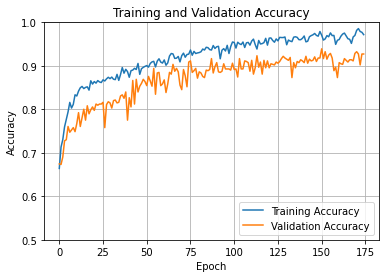

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy'), plt.ylabel('Accuracy'), plt.xlabel('Epoch')
plt.legend(loc='lower right'), plt.ylim([0.5, 1]), plt.grid()
plt.savefig("/content/drive/MyDrive/PHOTOS/EightCodeWithTestAndValidationMatrix/ValidationTrainingAccuracy.png")

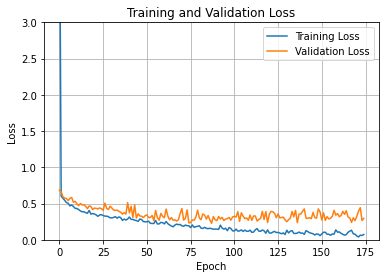

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch'), plt.ylabel('Loss'), plt.title('Training and Validation Loss')
plt.legend(loc='upper right'), plt.ylim([0, 3]), plt.grid()
plt.savefig("/content/drive/MyDrive/PHOTOS/EightCodeWithTestAndValidationMatrix/ValidationTrainingLoss.png")

In [ ]:
PredictionTestLabels = model.predict(TestImages)
PredictionTestLabels=np.round(PredictionTestLabels)
ConfusionTestMatrix = confusion_matrix(TestLabels, PredictionTestLabels)
print("Confusion matrix : \n",ConfusionTestMatrix)

TN, FP, FN, TP = confusion_matrix(TestLabels, PredictionTestLabels).ravel()
print('\nTrue Positive : {}\nFalse Negative: {}\nFalse Positive: {}\nTrue Negative: {}'.format(TP, FN, FP, TN))

TestPrecisionValue = TP / (TP+FP)
TestRecallValue = TP / (TP+FN)
TestAccurayValue = (TP + TN) /(TP + FN + FP + TN)
TestF1Score =   2 * (TestPrecisionValue * TestRecallValue) / (TestPrecisionValue + TestRecallValue)
print("\nPresicion: %{:.2f}\nRecall: %{:.2f}\nAccuracy: %{:.2f}\nF1-Score: %{:.2f}".format(TestPrecisionValue*100,TestRecallValue*100,TestAccurayValue*100,TestF1Score*100))

TestTable = classification_report(TestLabels,PredictionTestLabels,labels=[1,0])
print("Classification report : \n\n",TestTable)

Confusion matrix : 
 [[514  11]
 [ 46 185]]

True Positive : 185
False Negative: 46
False Positive: 11
True Negative: 514

Presicion: %94.39
Recall: %80.09
Accuracy: %92.46
F1-Score: %86.65
Classification report : 

               precision    recall  f1-score   support

           1       0.94      0.80      0.87       231
           0       0.92      0.98      0.95       525

    accuracy                           0.92       756
   macro avg       0.93      0.89      0.91       756
weighted avg       0.93      0.92      0.92       756



In [ ]:
open("/content/drive/MyDrive/CNN TYPES/Version1.json","w").write(model.to_json())
model.save_weights("/content/drive/MyDrive/CNN TYPES/Version1.h5")

In [ ]:
model.save("/content/drive/MyDrive/CNN TYPES/Version1.h5")